In [44]:
import os
print(os.getcwd())

C:\cygwin64\home\mpatnam\CSCIE63\Project


In [45]:
###### README ######
### Data Columns ###
# col1 Date
# col2 Open
# col3 High
# col4 Low
# col5 Close
# col6 Volume
# col7 Adj Close     (X)
# col8 Aggr Score1   (Y)
# col9 Aggr Score2

# try two models #
# Predict Sentiment Score (Y) using Close Price (X)
# Predict Close Price (Y) using Sentiment Score (X)

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

DATA_FILE = 'ClosePrices2.xlsx'



# Step 1: read in data from the .xls file
book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
n_samples = sheet.nrows - 1
print('total samples: {0}'.format(n_samples))

# Step 2: use 80% of data for training, remaining for test.
train_samples = int(0.8*n_samples)
train_data = np.asarray([sheet.row_values(i) for i in range(1, train_samples)])
test_samples = n_samples - train_samples
test_data = np.asarray([sheet.row_values(i) for i in range(train_samples+1, n_samples)])

# train samples
print('\nnumber of train samples: {0}'.format(train_samples))
print('Train sample: {0}'.format(train_data[0]))

# test samples
print('\nnumber of test samples: {0}'.format(test_samples))
print('Test sample: {0}'.format(test_data[0]))

total samples: 42

number of train samples: 33
Train sample: [  4.27950000e+04   1.37889999e+02   1.40149994e+02   1.37600006e+02
   1.39789993e+02   3.64146000e+07   1.39789993e+02  -5.00000000e-01
  -5.00000000e-02]

number of test samples: 9
Test sample: [  4.28430000e+04   1.41410004e+02   1.42039993e+02   1.41110001e+02
   1.41199997e+02   1.46608000e+07   1.41199997e+02   2.00000000e-01
   8.00000000e-02]


In [47]:
# Step 3: create placeholders for input Y (Aggregate Sentiment Score) and label X (Close Price)
X = tf.placeholder(tf.float32, [1, 1], name='X')
Y = tf.placeholder(tf.float32, name='Y')

print(X)
print(Y)

# Step 4: create weight and bias, initialized to 0
w = tf.Variable(0.0, name='weights_1')
b = tf.Variable(0.0, name='bias')

print(w)
print(b)

# Step 5: build model to predict Y
##Y_predicted = tf.matmul(X, w) + b
Y_predicted = (X * w) + b 
print(Y_predicted)

Tensor("X_9:0", shape=(1, 1), dtype=float32)
Tensor("Y_9:0", dtype=float32)
Tensor("weights_1_2/read:0", shape=(), dtype=float32)
Tensor("bias_5/read:0", shape=(), dtype=float32)
Tensor("add_4:0", shape=(1, 1), dtype=float32)


In [48]:
# Step 6: use the square error as the loss function
loss = tf.square(Y - Y_predicted, name='loss')

# Step 7: using gradient descent with learning rate of 0.00001 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.00000001).minimize(loss)

In [49]:
train_times=100  # train the model 100 times

with tf.Session() as sess:
    # Step 7: initialize the necessary variables, in this case, w and b
    sess.run(tf.global_variables_initializer()) 
    writer = tf.summary.FileWriter('C:/code/tensorflow/output/proj.regression2', sess.graph)
    
    # Step 8: train the model
    for i in range(train_times):
        total_loss = 0
        # y: SentimentScore
        # x: ClosePrice
        #flip x and y below to run second model
        for n, _, _, _, _, _, x, y, _ in train_data:
            # Session runs train_op and fetch values of loss
            #print('n:{0}, x:{1}, y:{2}'.format(n, x, y))
            _, l = sess.run([optimizer, loss], feed_dict={X: np.reshape([x], (1,1)) , Y:y }) 
            total_loss += l
        print('Average Loss epoch {0}: {1}'.format(i, total_loss/n_samples))

    # close the writer when you're done using it
    writer.close() 

    # Step 9: output the values of w and b
    w_value, b_value = sess.run([w, b]) 

Average Loss epoch 0: [[ 0.25361651]]
Average Loss epoch 1: [[ 0.25269467]]
Average Loss epoch 2: [[ 0.2517961]]
Average Loss epoch 3: [[ 0.25092018]]
Average Loss epoch 4: [[ 0.25006643]]
Average Loss epoch 5: [[ 0.24923424]]
Average Loss epoch 6: [[ 0.24842307]]
Average Loss epoch 7: [[ 0.24763238]]
Average Loss epoch 8: [[ 0.24686173]]
Average Loss epoch 9: [[ 0.24611048]]
Average Loss epoch 10: [[ 0.24537823]]
Average Loss epoch 11: [[ 0.24466446]]
Average Loss epoch 12: [[ 0.24396871]]
Average Loss epoch 13: [[ 0.24329056]]
Average Loss epoch 14: [[ 0.2426295]]
Average Loss epoch 15: [[ 0.24198523]]
Average Loss epoch 16: [[ 0.24135716]]
Average Loss epoch 17: [[ 0.24074498]]
Average Loss epoch 18: [[ 0.24014828]]
Average Loss epoch 19: [[ 0.23956662]]
Average Loss epoch 20: [[ 0.23899966]]
Average Loss epoch 21: [[ 0.23844707]]
Average Loss epoch 22: [[ 0.23790844]]
Average Loss epoch 23: [[ 0.23738334]]
Average Loss epoch 24: [[ 0.23687159]]
Average Loss epoch 25: [[ 0.23637272]

In [50]:
# calculate squared value (for RMSE purpose) given a predicted and actual value
def squared_error(pred, actual):
    return (pred - actual) ** 2

# Step 8: report results
print('Weights:{0}'.format(w_value))
print('Bias: %2.5f' % b_value)

#access test columns
#flip indices to run second model
X, Y = test_data.T[6], test_data.T[7]
print('Test Close Prices: {0}'.format(X))
print('Test sample: {0}'.format(test_data[0]))
Y_predicted_test = X * w_value + b_value
print('Predicted Sentiment Score using test data:{0}'.format(Y_predicted_test))
print('Actual Sentiment Score:{0}'.format(Y))

# measure RMSE accuracy
accuracy_rmse = np.sqrt(squared_error(Y_predicted_test, Y).mean())
print('Model accuracy using RMSE: ', accuracy_rmse)

Weights:0.0011255745775997639
Bias: 0.00001
Test Close Prices: [ 141.199997  140.679993  142.440002  142.270004  143.639999  144.529999
  143.679993  143.789993]
Test sample: [  4.28430000e+04   1.41410004e+02   1.42039993e+02   1.41110001e+02
   1.41199997e+02   1.46608000e+07   1.41199997e+02   2.00000000e-01
   8.00000000e-02]
Predicted Sentiment Score using test data:[ 0.15893894  0.15835364  0.16033466  0.16014332  0.16168535  0.16268711
  0.16173036  0.16185418]
Actual Sentiment Score:[ 0.2   0.   -0.1   0.8   0.9   0.1  -0.41  0.51]
Model accuracy using RMSE:  0.433167392451


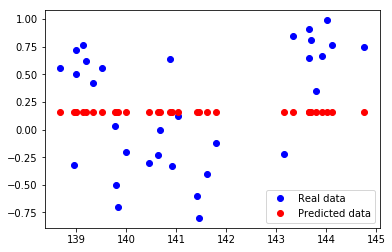

In [52]:
# plot the results
X, Y = train_data.T[6], train_data.T[7]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, (X * w_value) + b_value, 'ro', label='Predicted data')
plt.legend()
plt.show()